# Explanatory graphs

## Intuition

In [18]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from aposteriori import ndfu


GRAPH_DIR = Path("./graphs")
sns.set_theme(style="whitegrid")

In [19]:
def save_plot(path: Path) -> None:
    """
    Saves a plot to the specified filepath.

    :param path: The full path (including filename) where the plot will be saved.
    :type path: pathlib.Path
    """
    path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(path, bbox_inches="tight")
    print(f"Figure saved to {path.resolve()}")


def gaussian(x, mu, sigma=1):
    """Define a Gaussian function."""
    return np.exp(-((x - mu) ** 2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_single_comment.png


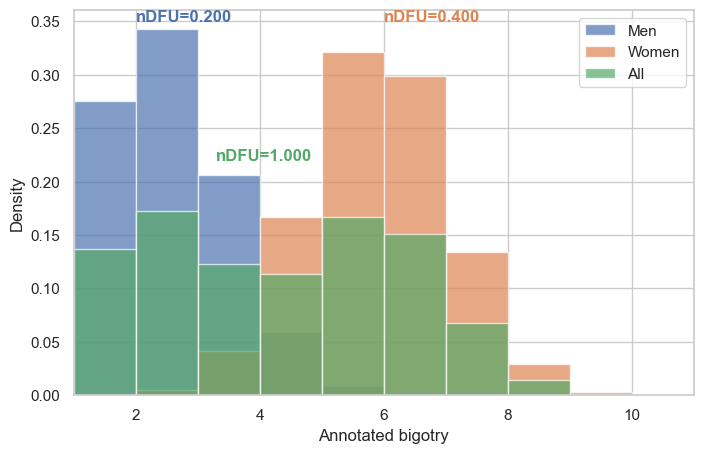

In [20]:
colors = sns.color_palette()
k = 10
x = np.linspace(0, 10, k)
d1_mean = 2
d2_mean = 6

d1 = gaussian(x, mu=d1_mean, sigma=1.3)
d2 = gaussian(x, mu=d2_mean, sigma=1.3)
d_union = d1 + d2

n_d1 = ndfu(d1, bins=10)
n_d2 = ndfu(d2, bins=10)
n_union = ndfu(d_union, bins=10)
ndfus = [n_d1, n_d2, n_union]

x_values = [d1_mean, d2_mean, (d1_mean + d2_mean) / 2 - 0.7]
y_values = [0.35, 0.35, 0.22]

plt.figure(figsize=(8, 5))
plt.hist(x, weights=d1, bins=k, density=True, alpha=0.7, color=colors[0], label="Men")
plt.hist(x, weights=d2, bins=k, density=True, alpha=0.7, color=colors[1], label="Women")
plt.hist(x, weights=d_union, bins=k, density=True, alpha=0.7, color=colors[2], label="All")

# Annotating nDFU values
for pos, val, color, ndfu_value in zip(x_values, y_values, colors, ndfus):
    text = f"nDFU={ndfu_value:.3f}"
    plt.text(pos, val, text, color=color, weight="bold")


plt.xlim(1, 11)
plt.legend()
plt.xlabel("Annotated bigotry")
plt.ylabel("Density")

save_plot(GRAPH_DIR / "ndfu_single_comment.png")
plt.show()

## Why comment-level?

In [21]:
def truncated_normal(loc, scale, lower=0, upper=10, size=1000):
    a, b = (lower - loc) / scale, (upper - loc) / scale
    return scipy.stats.truncnorm(a, b, loc=loc, scale=scale).rvs(size)


d_woman_comment1 = truncated_normal(loc=d2_mean, scale=1.3, size=1000)
d_woman_comment2 = truncated_normal(loc=d1_mean, scale=1.3, size=1000)

d_man_comment1 = truncated_normal(loc=d1_mean, scale=1.3, size=1000)
d_man_comment2 = truncated_normal(loc=d2_mean, scale=1.3, size=1000)

d_woman = d_woman_comment1 + d_woman_comment2
d_man = d_man_comment1 + d_man_comment2

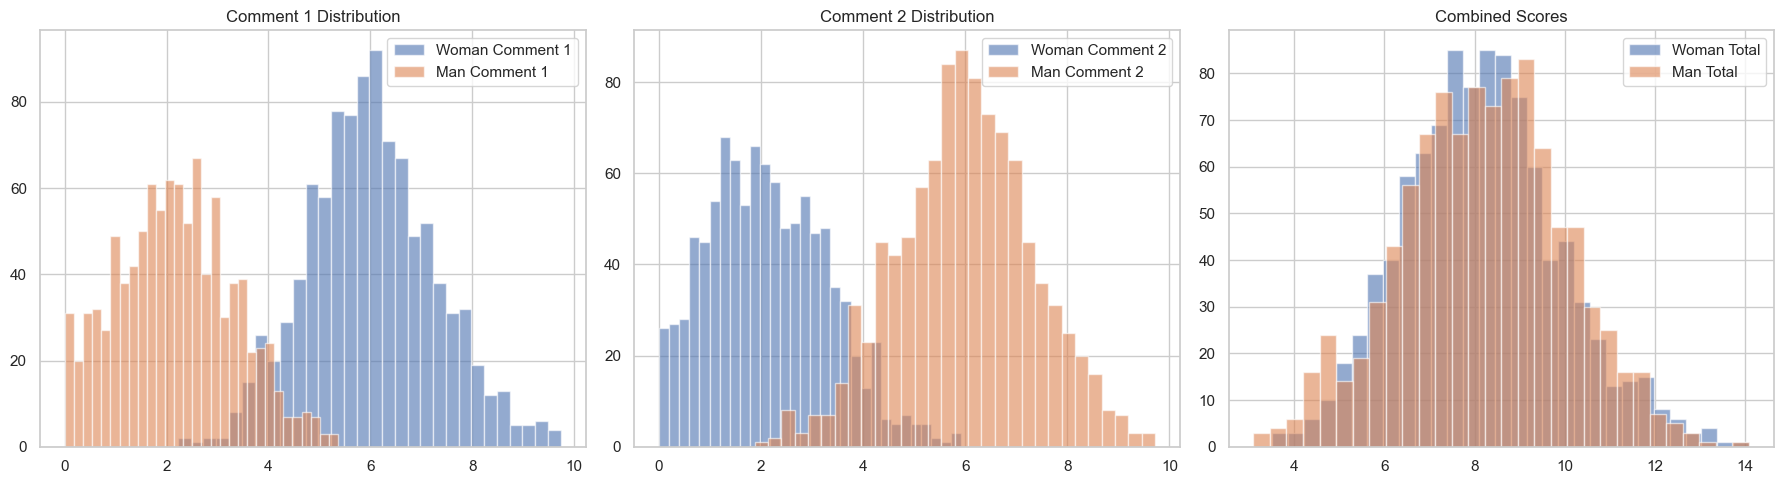

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

# Plot comment1 histograms
axs[0].hist(d_woman_comment1, bins=30, alpha=0.6, label='Woman Comment 1')
axs[0].hist(d_man_comment1, bins=30, alpha=0.6, label='Man Comment 1')
axs[0].set_title('Comment 1 Distribution')
axs[0].legend()

# Plot comment2 histograms
axs[1].hist(d_woman_comment2, bins=30, alpha=0.6, label='Woman Comment 2')
axs[1].hist(d_man_comment2, bins=30, alpha=0.6, label='Man Comment 2')
axs[1].set_title('Comment 2 Distribution')
axs[1].legend()

# Plot combined scores
axs[2].hist(d_woman, bins=30, alpha=0.6, label='Woman Total')
axs[2].hist(d_man, bins=30, alpha=0.6, label='Man Total')
axs[2].set_title('Combined Scores')
axs[2].legend()

plt.show()